In [1]:
import os
os.chdir("../")
import numpy as np 
from utils import *
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
def get_seed_and_loss(file_path):
    df = files_to_dataframe(bfs_search_and_get_files("../../worm_result"), allow_missing=True, warning=False)
#     df = df[df.model_name.str.contains("FF_1D")]
    df['seed'] = df['ham_path'].str.extract(r'seed_(\d+)').astype(int)
    df['loss'] = df['u_path'].str.extract(r'loss_([+|-]?[0-9]*\.[0-9]+|[0-9]+\.[0-9]*$)').astype(float)
    return df
df = get_seed_and_loss("../../worm_result")
df = df[df.sweeps == 4*10**6]


In [28]:
df

,model_name,alpha,temperature,n_sites,u_path,ham_path,sweeps,e,e_error,as,as_error,c,c_error,m,m_error,chi,chi_error,seed,loss
0,FF_1D_L_29,0.2,0.1000,29,,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,-4.516950,1.522780,0.001042,0.001247,9.850340,11.979900,0.0,0.0,0.0,0.0,5,NaN
1,FF_1D_L_29,0.2,0.1000,29,,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,-8.131950,2.469150,0.000721,0.000939,65.141500,87.286000,0.0,0.0,0.0,0.0,4,NaN
2,FF_1D_L_29,0.2,0.1000,29,,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,-11.241300,1.396800,0.001345,0.000852,7.627680,16.817800,0.0,0.0,0.0,0.0,3,NaN
3,FF_1D_L_29,0.2,0.1000,29,,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,-13.375500,1.282260,-0.001280,0.000922,10.896800,14.522600,0.0,0.0,0.0,0.0,2,NaN
4,NaN,0.2,0.1000,29,,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,-inf,NaN,-0.000157,0.001056,inf,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,FF_1D,0.2,1.0000,54,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,13.578100,0.008106,0.794731,0.000759,0.232551,0.001116,0.0,0.0,0.0,0.0,0,0.17387
531,FF_1D,0.2,0.2154,54,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,0.826477,0.012051,0.208890,0.002354,0.082301,0.019915,0.0,0.0,0.0,0.0,5,0.06638
532,FF_1D,0.2,0.2154,54,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,0.025529,0.001863,1.000000,0.000000,0.007592,0.003937,0.0,0.0,0.0,0.0,2,0.00002
533,FF_1D,0.2,0.2154,54,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,0.006189,0.001724,1.000000,0.000000,-0.005150,0.003710,0.0,0.0,0.0,0.0,1,0.00000


## Compare for different beta at L = 6

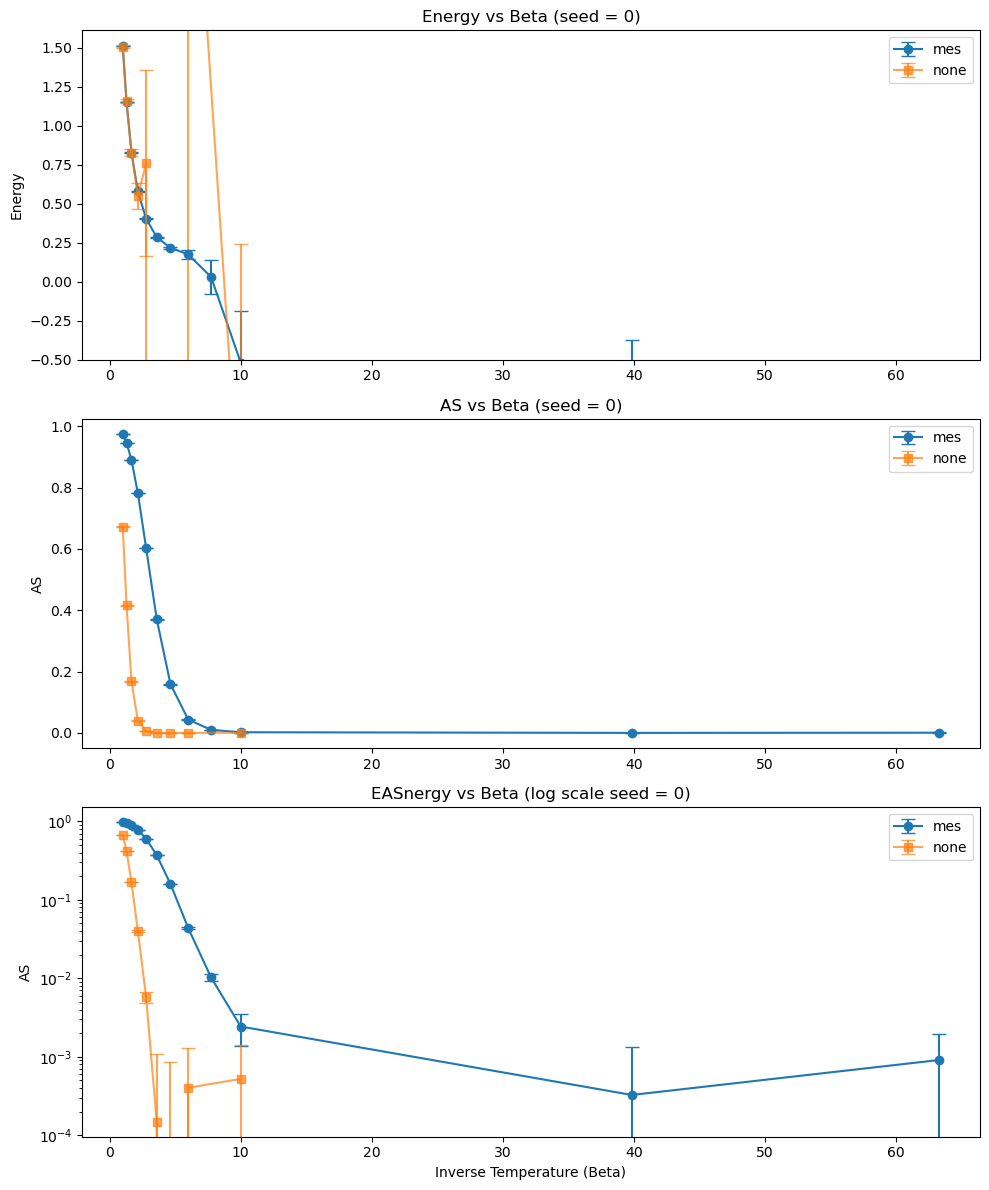

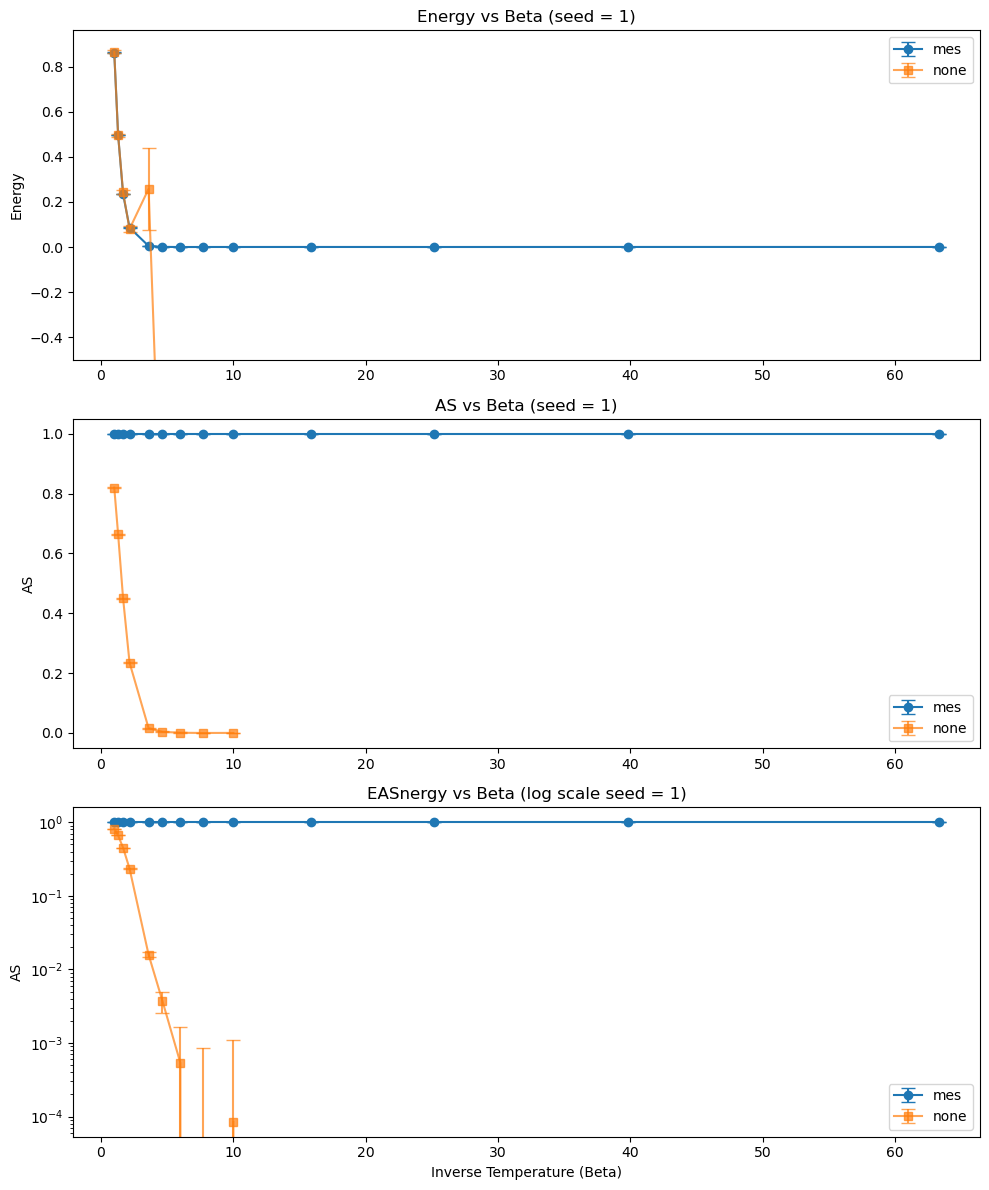

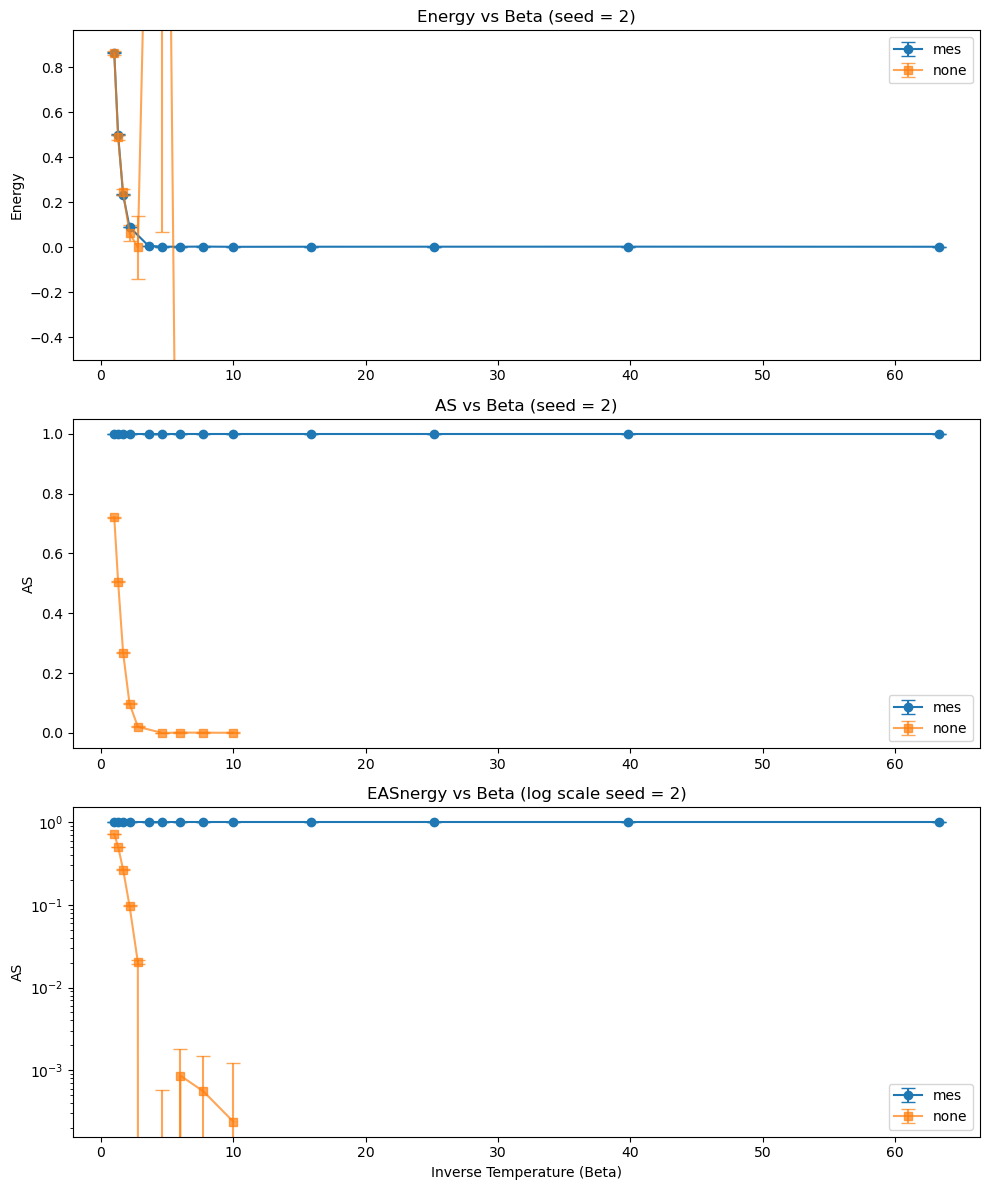

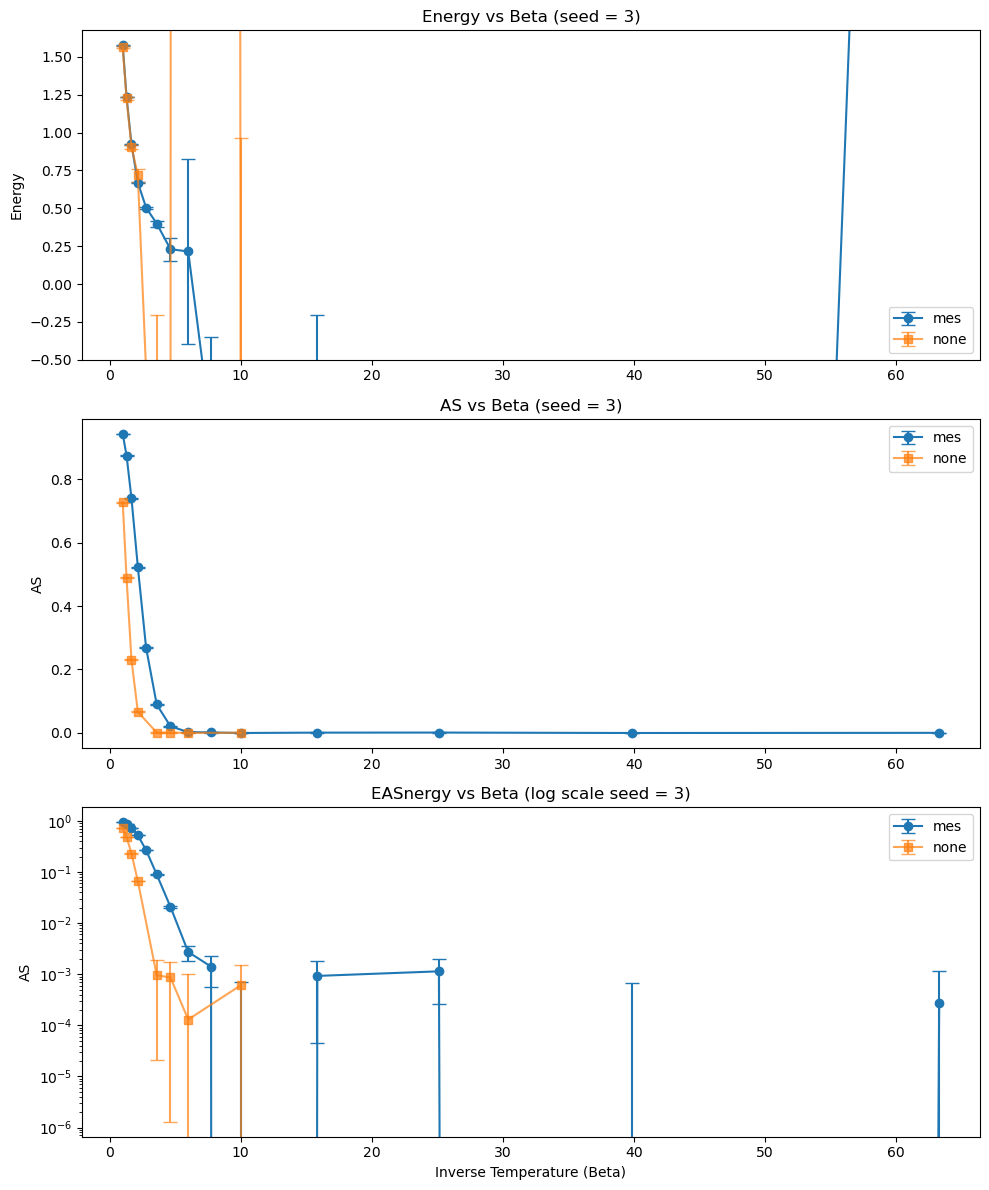

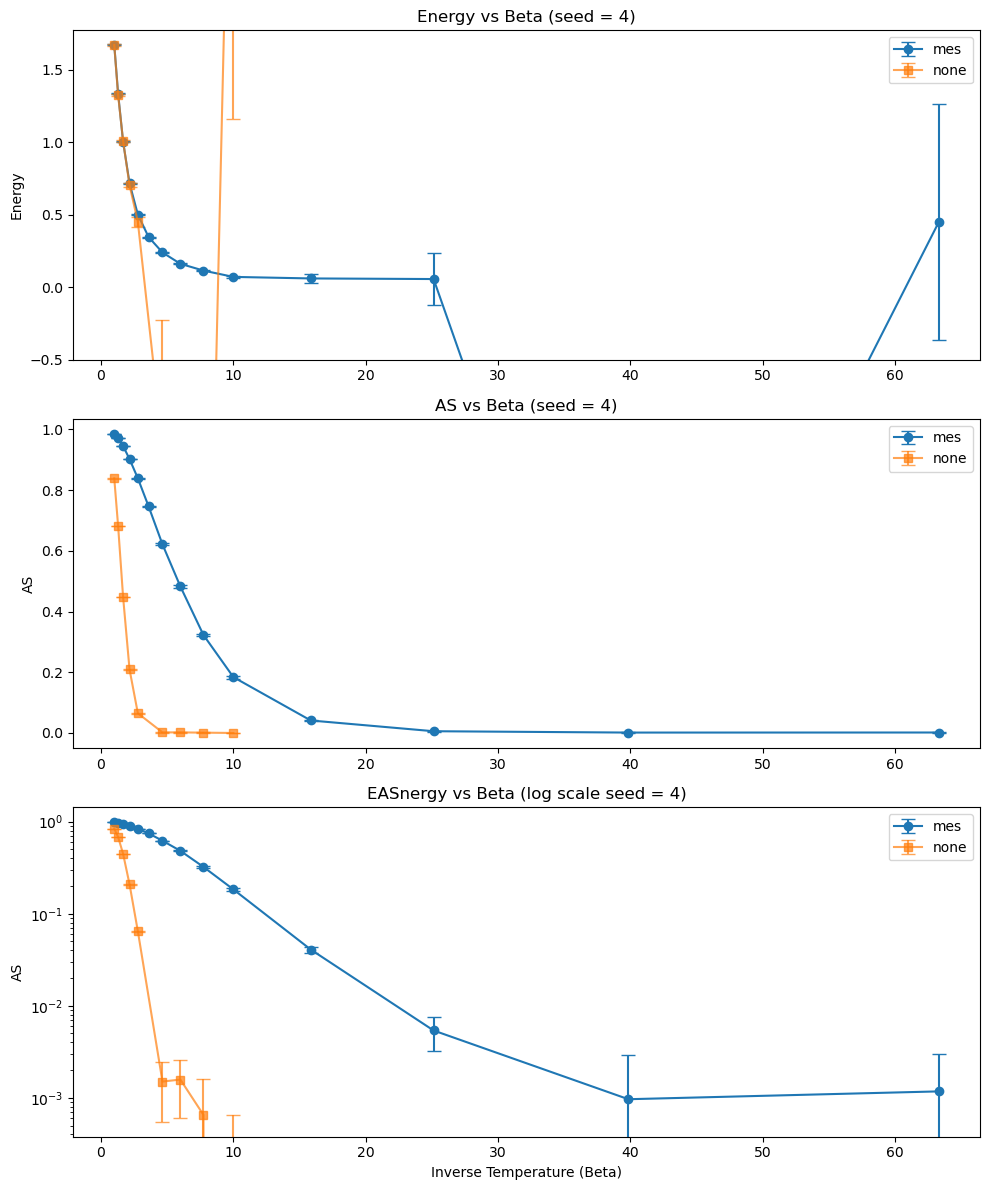

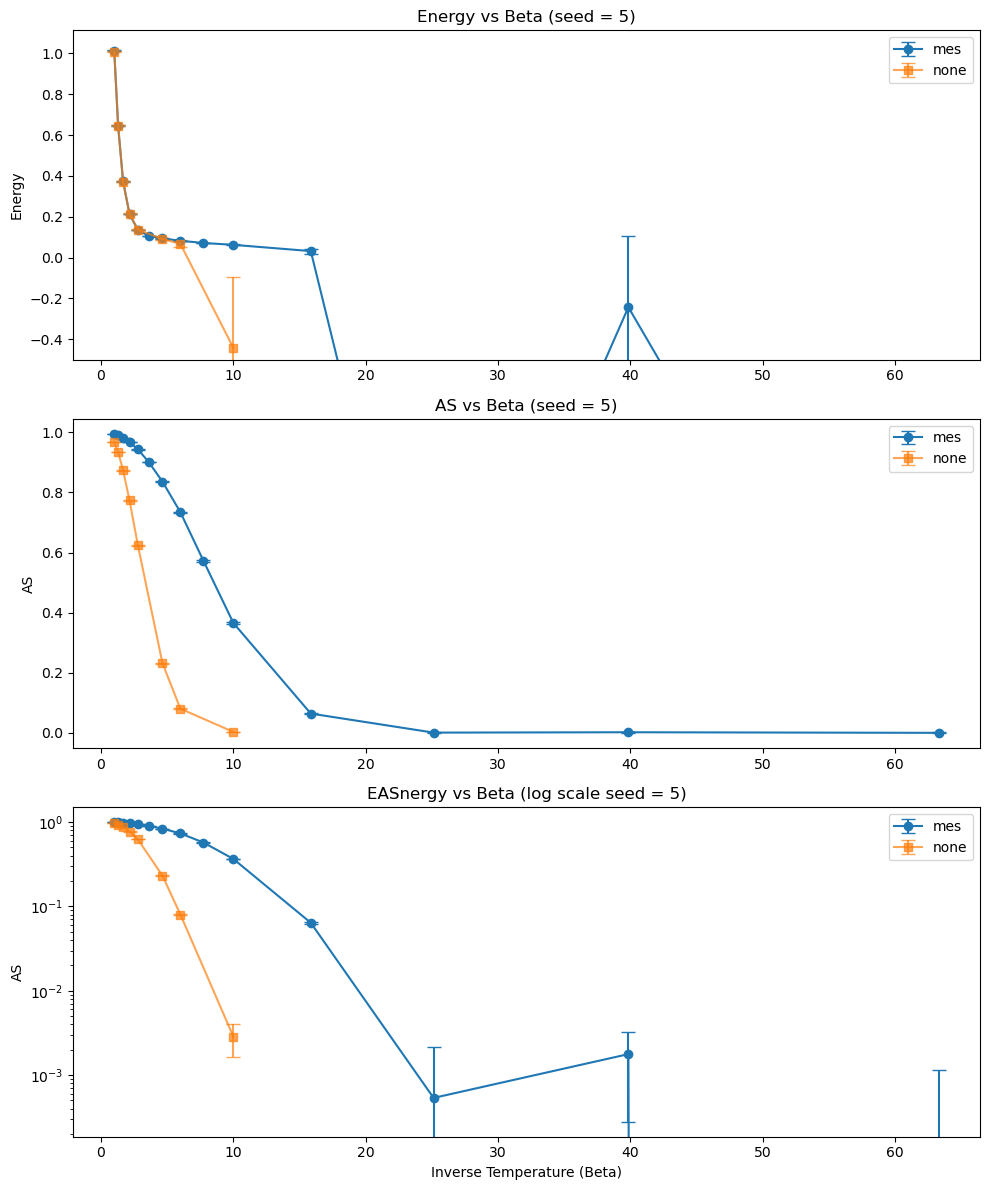

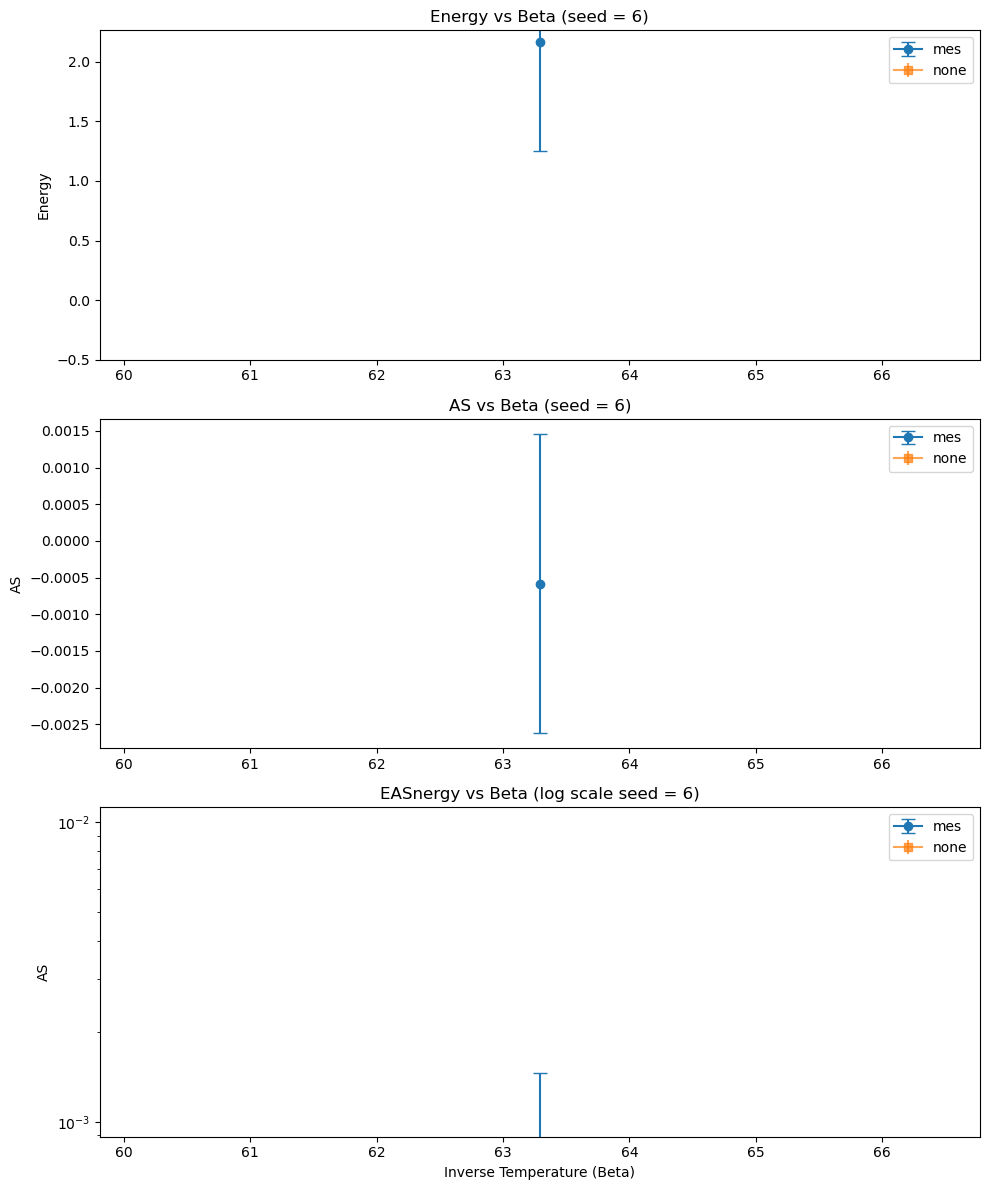

In [3]:
df_n = df[df.n_sites == 6]
seed_list = sorted(df_n.seed.unique())

for seed in seed_list:
    dfs = df_n[df_n.seed == seed]
    df_dict = {}
    df_dict["mel"] = dfs[dfs.u_path.str.contains("mel")]
    df_dict["none"] = dfs[dfs.u_path == ""]

    for key, _df in df_dict.items():
        df_dict[key] = _df.loc[_df.groupby("temperature")["as"].idxmax()].sort_values(by="temperature")

    fig, ax = plt.subplots(3, figsize=(10, 12))
    # gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0.4)
    ax1 = ax[0]
    ax2 = ax[1]
    ax3 = ax[2]

    # Plotting Energy vs Inverse Temperature (Beta) in ax1
    ax1.errorbar(1/df_dict["mel"]['temperature'], df_dict["mel"]['e'], yerr=df_dict["mel"]['e_error'], fmt='o-', capsize=5, label='mes')
    ax1.errorbar(1/df_dict["none"]['temperature'], df_dict["none"]['e'], yerr=df_dict["none"]['e_error'], fmt='s-', capsize=5, label='none', alpha=0.7)
    ax1.set_title(f'Energy vs Beta (seed = {seed})')
    ax1.set_ylabel('Energy')
    ax1.legend()
    ax1.set_ylim(-0.5, df_dict["mel"].e.iloc[-1]+0.1)

    # Plotting AS vs Inverse Temperature in ax2
    ax2.errorbar(1/df_dict["mel"]['temperature'], df_dict["mel"]['as'], yerr=df_dict["mel"]['as_error'], fmt='o-', capsize=5, label='mes')
    ax2.errorbar(1/df_dict["none"]['temperature'], df_dict["none"]['as'], yerr=df_dict["none"]['as_error'], fmt='s-', capsize=5, label='none', alpha=0.7)
    ax2.set_title(f'AS vs Beta (seed = {seed})')
    ax2.set_ylabel('AS')
    ax2.legend()

    # Plotting AS vs Inverse Temperature (Log Scale) in ax3
    ax3.errorbar(1/df_dict["mel"]['temperature'], df_dict["mel"]['as'], yerr=df_dict["mel"]['as_error'], fmt='o-', capsize=5, label='mes')
    ax3.errorbar(1/df_dict["none"]['temperature'], df_dict["none"]['as'], yerr=df_dict["none"]['as_error'], fmt='s-', capsize=5, label='none', alpha=0.7)
    ax3.set_title(f'EASnergy vs Beta (log scale seed = {seed})')
    ax3.set_xlabel('Inverse Temperature (Beta)')
    ax3.set_ylabel('AS')
    ax3.set_yscale('log')
    ax3.legend()

    plt.tight_layout()
    plt.show()



## Compare for different beta and different L

In [32]:
dft

,model_name,alpha,temperature,n_sites,u_path,ham_path,sweeps,e,e_error,as,as_error,c,c_error,m,m_error,chi,chi_error,seed,loss
245,FF_1D_L_6,0.2,0.0158,6,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,-0.802397,0.408123,0.000625,0.000957,163.592,121.109,0.0,0.0,0.0,0.0,0,0.17387
246,FF_1D_L_6,0.2,0.0158,6,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,-0.852408,0.292592,0.000910,0.001027,105.774,176.491,0.0,0.0,0.0,0.0,0,0.17387


number of data is not sufficient
number of data is not sufficient
number of data is not sufficient
number of data is not sufficient


/Users/keisukemurota/miniconda3/envs/torch21/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


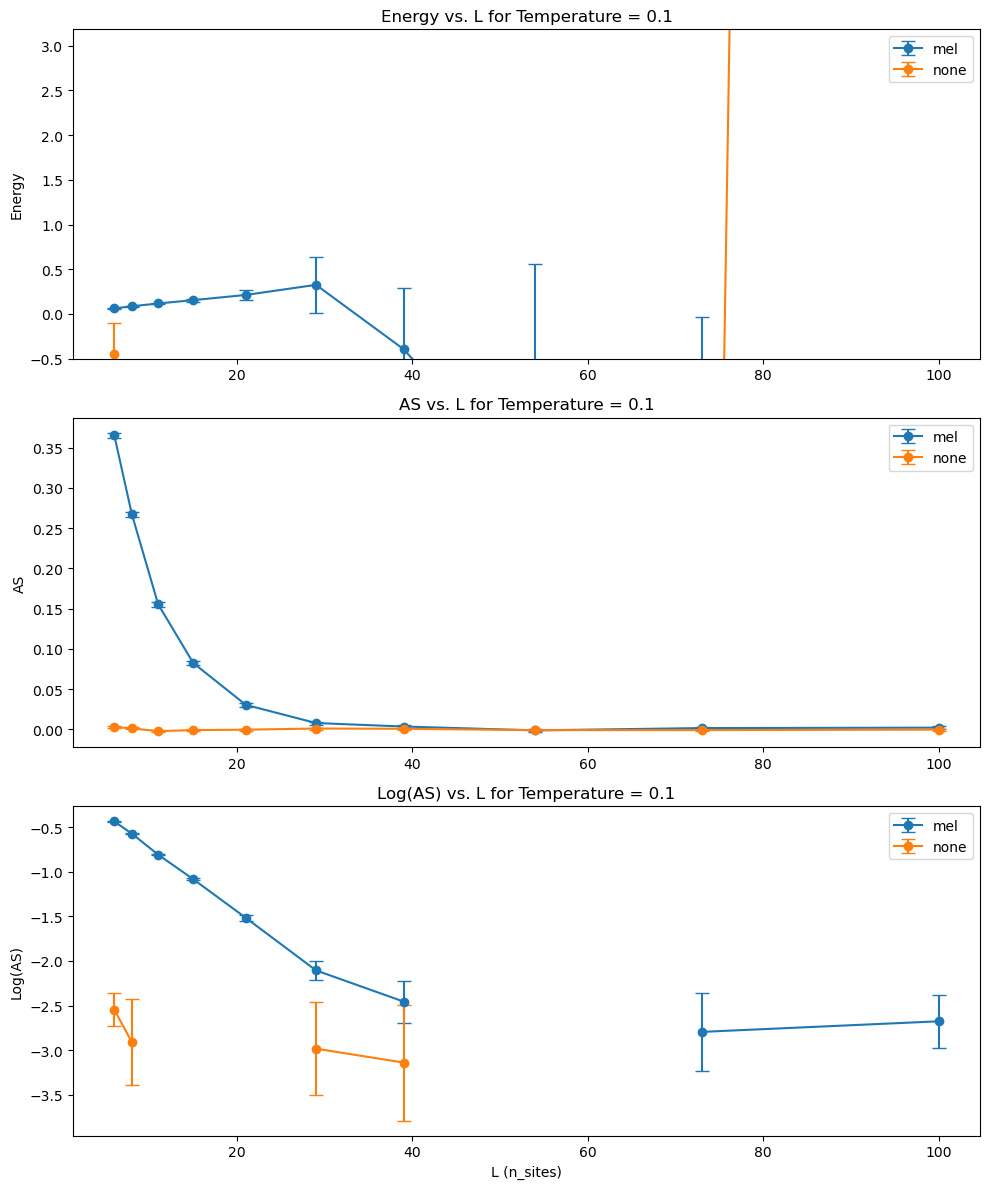

number of data is not sufficient
number of data is not sufficient


/Users/keisukemurota/miniconda3/envs/torch21/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


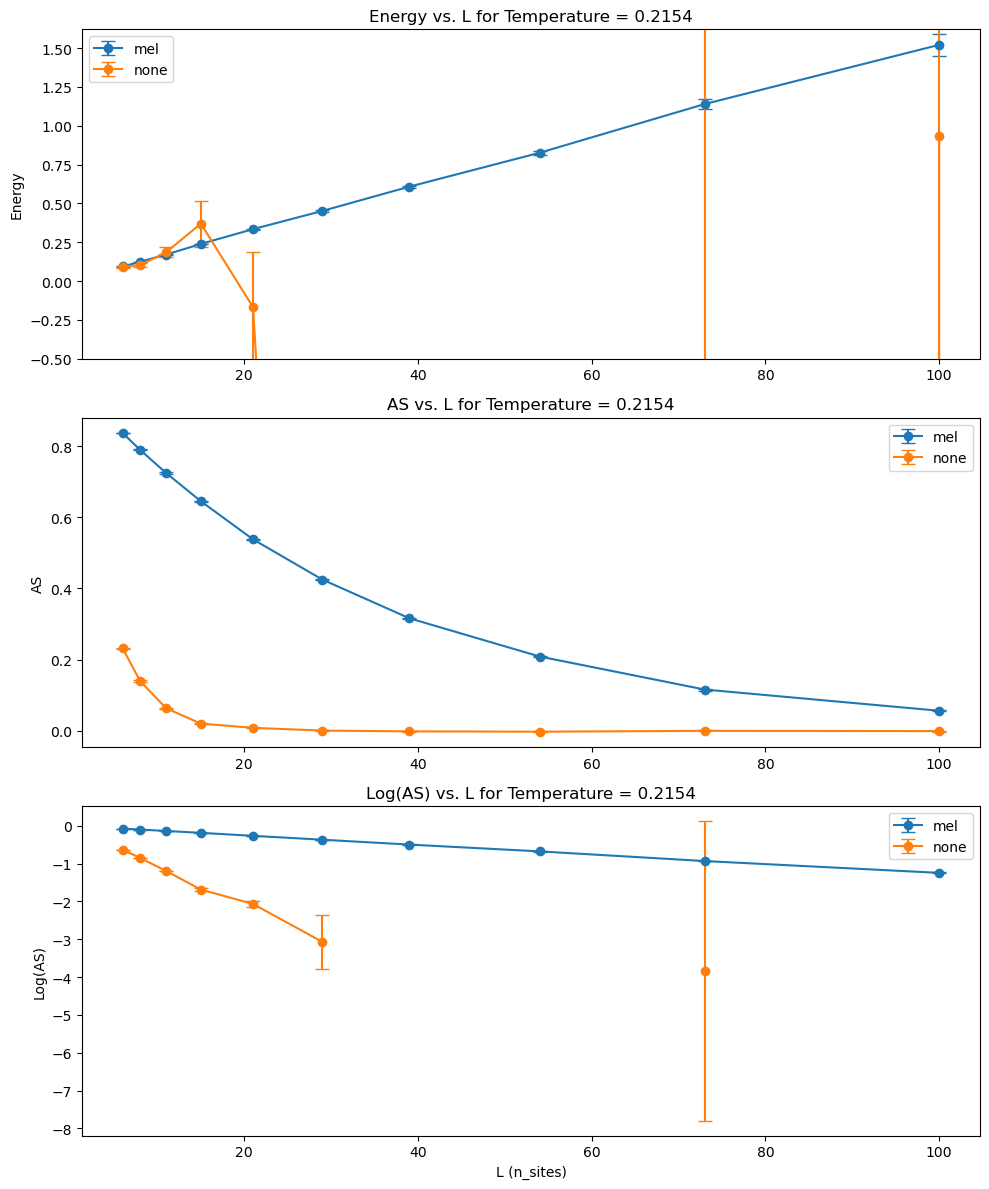

number of data is not sufficient
number of data is not sufficient


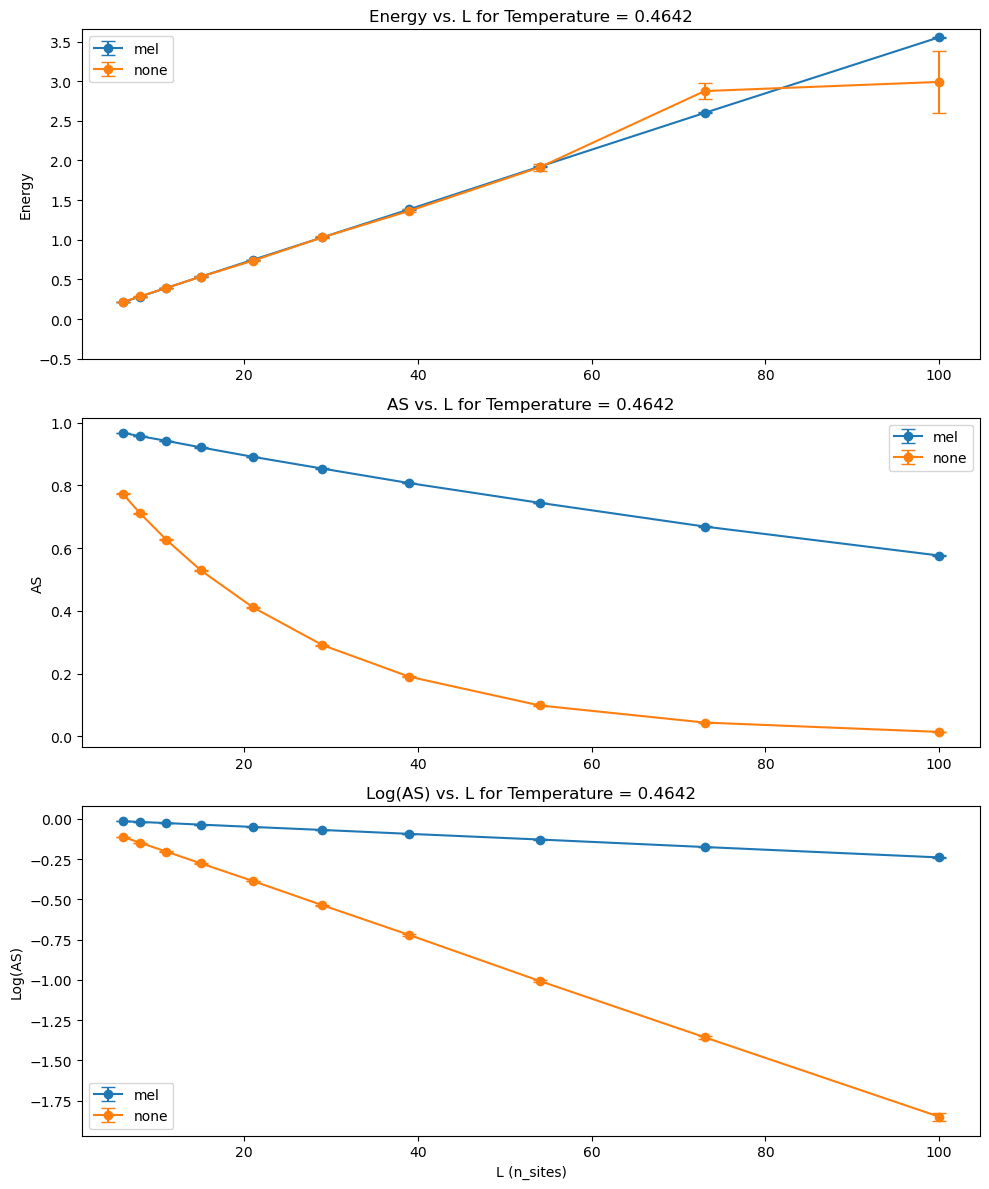

number of data is not sufficient
number of data is not sufficient


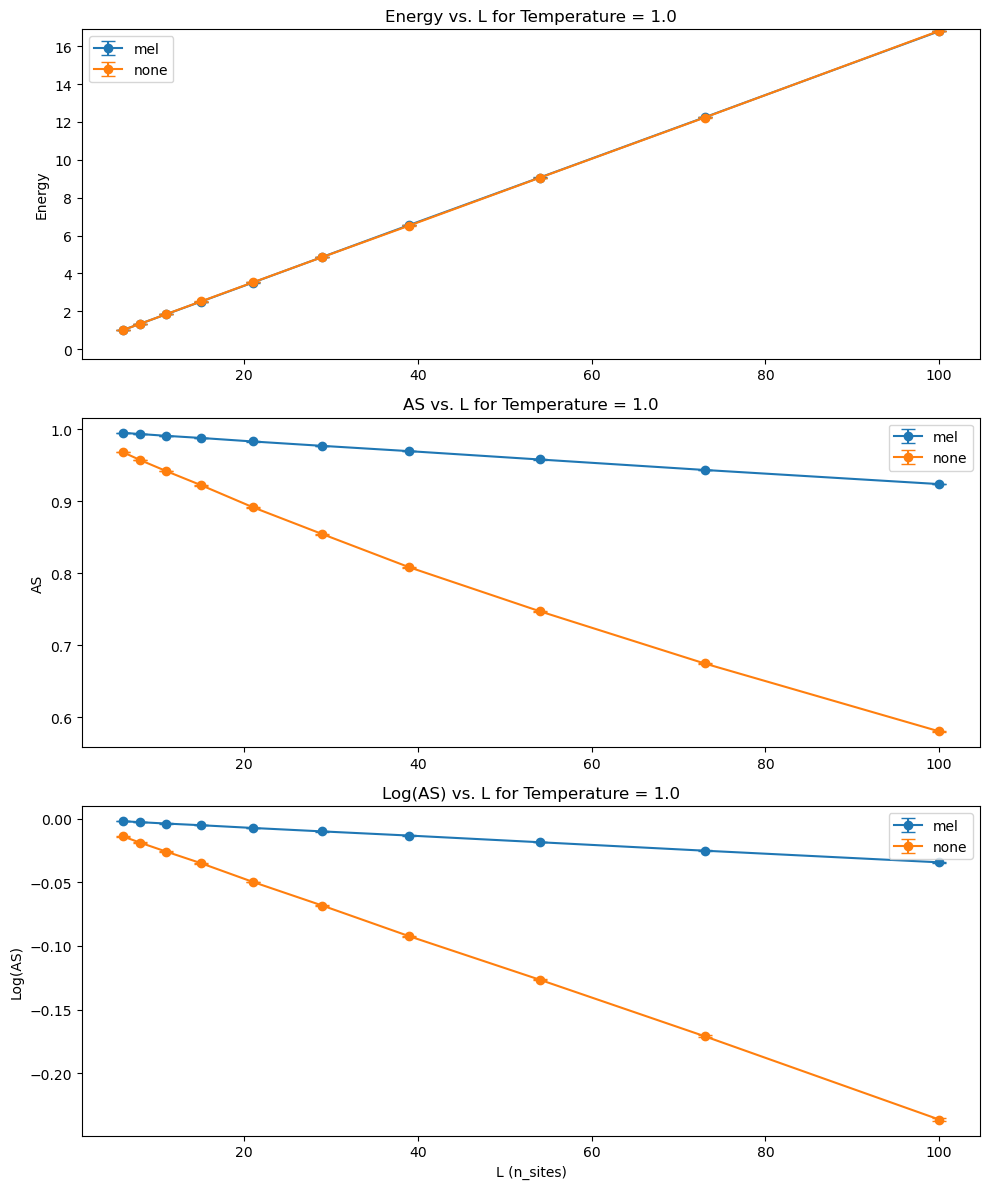

number of data is not sufficient


In [49]:
import matplotlib.pyplot as plt
import numpy as np

L_list = sorted(df.n_sites.unique())
dfs = df[df.seed == 5]
t_list = sorted(dfs.temperature.unique())

for t in t_list:
    dft = dfs[dfs.temperature == t]
    df_dict = {}
    df_dict["mel"] = dft[dft.u_path.str.contains("mel")]
    df_dict["none"] = dft[dft.u_path == ""]
    
    if (len(dft) / len(df_dict)) < 2:
        print("number of data is not sufficient")
        continue
    
    for key, _df in df_dict.items():
        df_dict[key] = _df.loc[_df.groupby("n_sites")["as"].idxmax()].sort_values(by="n_sites")

    fig, ax = plt.subplots(3, figsize=(10, 12))
    ax1 = ax[0]
    ax2 = ax[1]
    ax3 = ax[2]

    # 1. Plotting Energy vs L in ax1
    for key, _df in df_dict.items():
        ax1.errorbar(_df["n_sites"], _df["e"], yerr=_df["e_error"], label=key, marker='o', capsize=5)
    ax1.set_title(f'Energy vs. L for Temperature = {t}')
    ax1.set_ylabel('Energy')
#     ax1.set_ylim(-, 3)
    ax1.set_ylim(-0.5, np.abs(df_dict["mel"].e.iloc[-1]+0.1))
    ax1.legend()

    # 2. Plotting AS vs L in ax2
    for key, _df in df_dict.items():
        ax2.errorbar(_df["n_sites"], _df["as"], yerr=_df["as_error"], label=key, marker='o', capsize=5)
    ax2.set_title(f'AS vs. L for Temperature = {t}')
    ax2.set_ylabel('AS')
    ax2.legend()

    # 3. Plotting AS (log) vs L in ax3
    for key, _df in df_dict.items():
        as_log_error = np.abs(_df["as_error"] / (_df["as"] * np.log(10)))
        ax3.errorbar(_df["n_sites"], np.log10(_df["as"]), yerr=as_log_error, label=key, marker='o', capsize=5)
    ax3.set_title(f'Log(AS) vs. L for Temperature = {t}')
    ax3.set_xlabel('L (n_sites)')
    ax3.set_ylabel('Log(AS)')
    ax3.legend()

    plt.tight_layout()
    plt.show()
